# 1D Poisson equation with Dirichlet boundary conditions

This notebook describes the finite-difference solver for  

$$
\begin{align}
 &- \phi''(x) = \rho(x)\,,\qquad x\in (a,b) \subset \mathbb R\,,
 \\[1mm]
 &\phi(a) = \alpha\,,\quad \phi(b) = \beta\,.
\end{align}
$$

See the [first exercise sheet](http://www-m16.ma.tum.de/foswiki/pub/M16/Allgemeines/CompPlasmaPhys22/exercise01.pdf) for details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N =  8
L1-error:  1.515257745569547
L2-error:  0.6909066980901427
Linf-error:  0.43284764796312203
smallest eigenvalue:  0.24680370769166515

N =  16
L1-error:  0.7420462142445944
L2-error:  0.23763946443608394
Linf-error:  0.10527610540659982
smallest eigenvalue:  0.24919784101124104

N =  32
L1-error:  0.36848466036761685
L2-error:  0.08345055928026666
Linf-error:  0.026140358556238752
smallest eigenvalue:  0.2497992668847947

N =  64
L1-error:  0.1840141032113846
L2-error:  0.02945444297305786
Linf-error:  0.006529446142300888
smallest eigenvalue:  0.24994980462801608

N =  128
L1-error:  0.09196309805965402
L2-error:  0.010409326286298386
Linf-error:  0.0016323459253748673
smallest eigenvalue:  0.24998745040122772

N =  256
L1-error:  0.04597928040226724
L2-error:  0.003679864598151437
Linf-error:  0.00040804288446461
smallest eigenvalue:  0.24999686255214182

convergence rate with L1: 1.007174629091185
convergence rate with L2: 1.5086967427004507
convergence rate with Linf: 2.0082

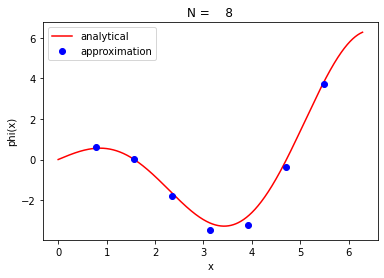

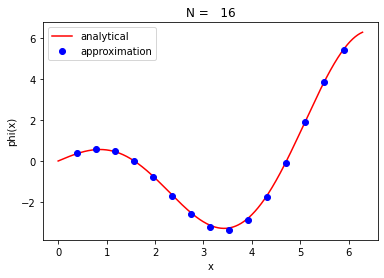

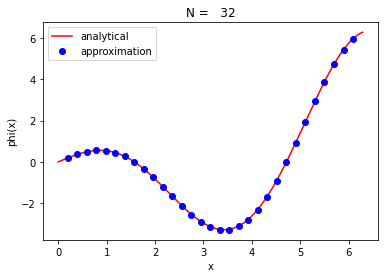

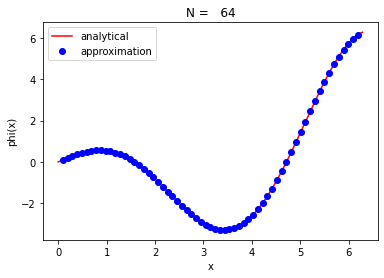

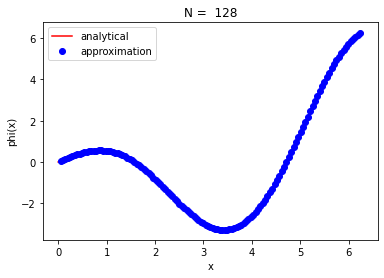

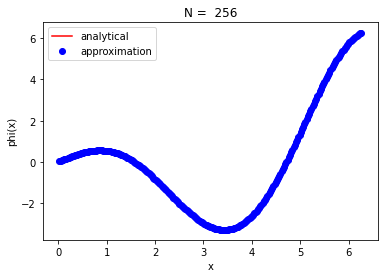

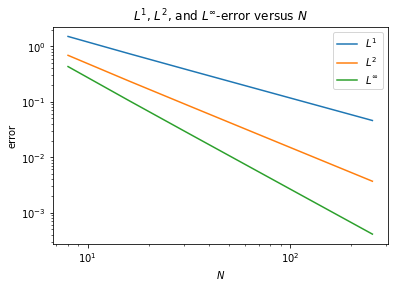

In [62]:
# Discretize the domain
a = 0
b = 2 * np.pi
L = b - a
N_vec = [8, 16, 32, 64, 128, 256]

# boundary conditions:
alpha = 0  # value of solution at x=a
beta  = 2 * np.pi  # value of solution at x=b

# analytical solution (for testing purposes):
phi_ana = lambda x: x * np.cos(x)

# method of manufactured solutions: 
# insert analytical solution into Poisson equation to compute the rhs.
rho = lambda x: 2 * np.sin(x) + x * np.cos(x)

# create array to save errors
L1_arr   = np.empty( len(N_vec) )
L2_arr   = np.empty( len(N_vec) )
Linf_arr = np.empty( len(N_vec) )

#create continuous mesh and analytical solution for nice plot
x_cont = np.linspace(a,b,1000)
phi_cont = phi_ana( x_cont )


# do the convergence study:
for k,N in enumerate(N_vec):
    
    # grid:
    x_arr = np.linspace(a,b,N+1)
    h = L / N
    
    # matrix assembly:  

    Ah = (2 * np.eye((N-1)) + 
          np.block([[np.zeros(((N-2), 1)), -1 * np.eye((N-2))],[0, np.zeros((1, (N-2)))]]) + 
         np.block([[np.zeros((1, (N-2))), 0],[-1 * np.eye((N-2)), np.zeros((N-2, (1)))]])) / h**2
        
    #print(Ah, '\n')
    
    # Compute eigenvalues
    eig_vals = np.linalg.eigvals(Ah)
    
    # right-hand side:
    rhs = rho(x_arr[1:-1])
    rhs[0]  += alpha / h**2 # boundary condition
    rhs[-1] += beta / h**2 # boundary condition
    
    # solve linear system:
    phi_h = np.linalg.solve(Ah, rhs)
    
    # compare to the analytical solution at the grid points:
    phi      = phi_ana(x_arr[1:-1]) # quantities in boudary points are set
    
    err = phi_h - phi
    
    L1_err   = np.linalg.norm(err, 1)
    L2_err   = np.linalg.norm(err, 2)
    Linf_err = np.linalg.norm(err, np.inf)
    
    # Print out N, the errors and smallest eigenvalue
    print( 'N = ', N)
    print('L1-error: ', L1_err)
    print('L2-error: ', L2_err)
    print('Linf-error: ', Linf_err)
    print('smallest eigenvalue: ', eig_vals.min())
    print()
    
    L1_arr[k] = L1_err
    L2_arr[k] = L2_err
    Linf_arr[k] = Linf_err
    
    plt.figure()
    # plt.plot(x_arr[1:-1], phi, 'r-', label='analytical')
    plt.plot(x_cont, phi_cont, 'r-', label='analytical')
    plt.plot(x_arr[1:-1], phi_h, 'ob', label='approximation')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('phi(x)')
    plt.title('N = {:4d}'.format(N))
    
plt.figure()
plt.plot(N_vec, L1_arr, label='$L^1$')
plt.plot(N_vec, L2_arr, label='$L^2$')
plt.plot(N_vec, Linf_arr, label='$L^\infty$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$N$')
plt.ylabel('error')
plt.title('$L^1$, $L^2$, and $L^\infty$-error versus $N$')

L1_rate   = -np.polyfit(np.log(N_vec), np.log(L1_arr),1)[0] # y = k*x + b; k shows the rate
L2_rate   = -np.polyfit(np.log(N_vec), np.log(L2_arr),1)[0]
Linf_rate = -np.polyfit(np.log(N_vec), np.log(Linf_arr),1)[0]

print('convergence rate with L1:', L1_rate)
print('convergence rate with L2:', L2_rate)
print('convergence rate with Linf:', Linf_rate)

$1.$ Let's prove that the problem has unique solution. Let's assume that there exist another solution $\psi$ of the problem given.  
Let us denote $\eta := \phi - \psi.$ Then, $\eta$ is the solution of the following problem:
$\\[1mm]$
$$
\begin{align}
 &- \eta''(x) = 0\,,\qquad x\in (a,b) \subset \mathbb R\,,
 \\[1mm]
 &\eta(a) = 0,\quad \eta(b) = 0.
\end{align}
$$
$\\[1mm]$
The general solution of the equation (without the boundary conditions) is $Ax + B$. After applying boundary conditions we get that $\eta = 0$ for any $x$ in the given interval. Therefore, it is proven that the solution is unique in the given interval.

$2.$ The matrix is tridiagonal and contains $2/h^2$ on the main diagonal, and $-1/h^2$ on the sub- and super- diagonals. The minimum eigenvalue is larger than zero, which means that there exist a constant $C$ (independent of $h$) larger than zero, and each eigenvalue is larget than $C$. This serves as the sufficient condition for stability of the algorithm.

$4.$ The numerical solution converges to the analytical solution. The theoretical convergence rates for the 1st, 2nd, and the infinity norms are 1, 1.5, and 2 respectively. The convergence rates obtained by comparing the numerical and analytical solutions are in feet with the theoretical rates. The convergence rates are calculated as slopes of the $(N, L_i)$ plots.

